In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [370]:
telco=pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [371]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Data cleaning**

In [372]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Problems in dataset**
1. In this data set cutomer id is not usable
2. Total charges dtypes is object, so it must be float64 type

In [373]:
telco=telco.iloc[:,1:]

In [374]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [375]:
# pd.to_numeric(telco['TotalCharges'])
telco['TotalCharges'][488]

' '

In [376]:
telco=telco[telco['TotalCharges']!=' ']

In [377]:
telco.reset_index(drop=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [378]:
telco['TotalCharges']=telco['TotalCharges'].astype('float64')

In [379]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [380]:
for i in telco:
  print(f'{i}:{telco[i].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   

There is some No internet service feature in some columns so we have to change it to No.

In [381]:
telco.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [382]:
for i in range(len(telco.columns)):
  if i in range(9,15):
    telco[telco.columns[i]]=telco[telco.columns[i]].replace('No internet service','No')

the multiple lines columns have no phone service which means No. So we have to change is also

In [383]:
telco['MultipleLines']=telco['MultipleLines'].replace('No phone service','No')

In [384]:
for i in telco:
  print(f'{i}:{telco[i].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:['No' 'Yes']


In [385]:
edadata=telco.copy()

# Data Preprocessing

In [386]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
z=telco.select_dtypes(include='object')
for i in z:
  print(i)
  z[i]=le.fit_transform(z[i])

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [387]:
for i in z:
  print(f'{i}:{z[i].unique()}')

gender:[0 1]
Partner:[1 0]
Dependents:[0 1]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:[0 1 2]
OnlineSecurity:[0 2 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:[0 1 2]
PaperlessBilling:[1 0]
PaymentMethod:[2 3 0 1]
Churn:[0 1]


In [388]:
for i in telco:
  for j in z:
    if i==j:
      telco[i]=z[j]

In [389]:
telco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,2,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,2,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


now dataset have all numeric values in it but InternetService, contract and paymentmethod is in 3 or 4 decision choices so we have to change it according to one hot encoding

In [390]:
telco=pd.get_dummies(data=telco,columns=['Contract','PaymentMethod','InternetService'])
telco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,InternetService_0,InternetService_1,InternetService_2
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,2,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,2,1,0,2,1,0,0,0,0,1,53.85,108.15,1,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,2,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,2,0,1,1,1,1,1,84.80,1990.50,0,0,1,0,0,0,0,1,1,0,0
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,0,0,1,0,0,0,1,0
7040,0,0,1,1,11,0,0,2,0,0,0,0,0,1,29.60,346.45,0,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,1,0,0,0,0,0,1,0,1,0


In [391]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
telco[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(telco[['tenure','MonthlyCharges','TotalCharges']])
telco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,InternetService_0,InternetService_1,InternetService_2
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0.464789,1,0,2,0,1,0,0,0,0,0.385075,0.215867,0,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,0.014085,1,0,2,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0.619718,0,0,2,0,1,1,0,0,0,0.239303,0.210241,0,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,2,0,1,1,1,1,1,0.662189,0.227521,0,0,1,0,0,0,0,1,1,0,0
7039,0,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,0,1,0,0,1,0,0,0,1,0
7040,0,0,1,1,0.140845,0,0,2,0,0,0,0,0,1,0.112935,0.037809,0,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,1,0,0,0,0,0,1,0,1,0


# EDA of DATASET

In [392]:
edadata

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


lets see the data 

In [393]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


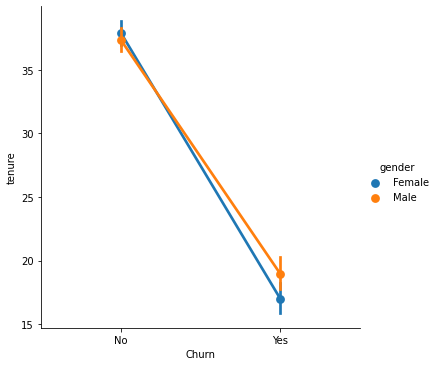

In [394]:

sns.factorplot(data=edadata,x='Churn',y='tenure',hue='gender')

*OBSERVATION:Tenure is inversely porportional to Churn, as per the graph those customer whose tenure is large , they do not left the company and viceversa.*

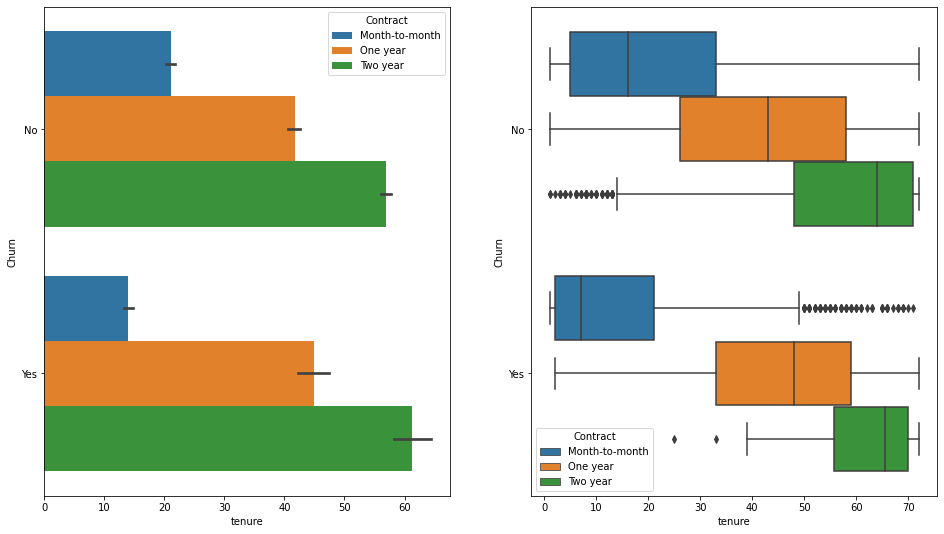

In [395]:
f,axes=plt.subplots(1,2,figsize=(16,9))
sns.barplot(ax=axes[0],x='tenure',y='Churn',hue='Contract',data=edadata)
sns.boxplot(ax=axes[1],x='tenure',y='Churn',hue='Contract',data=edadata)

*Observation: As per given graph, if customer whose tenure is low haveing month-to-month contract and tenure with middle range have one year contract and higher tenure peope have two year contract*

In [396]:
edadata.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


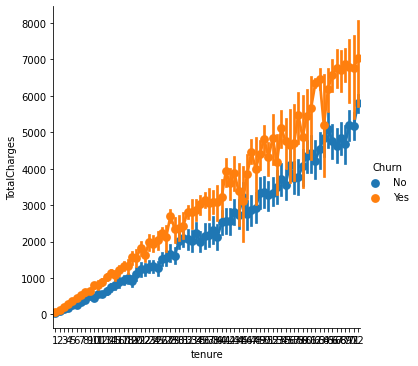

In [397]:

sns.factorplot(x='tenure',y='TotalCharges',hue='Churn',data=edadata)

*Observation: there are more customer who churn as there tenure and total charges are increasing *

# Train and Test split 

In [398]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(telco.drop(columns='Churn'),telco.Churn,test_size=0.3,random_state=7)

# Prediction 

In [400]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
                        keras.layers.Dense(20,input_shape=(len(X_train.columns),),activation='relu'),
                        keras.layers.Dense(15,activation='relu'),
                        keras.layers.Dense(10,activation='relu'),
                        keras.layers.Dense(5,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
154/154 [==============================] - 1s 940us/step - loss: 0.6452 - accuracy: 0.6233
Epoch 2/50
154/154 [==============================] - 0s 963us/step - loss: 0.4467 - accuracy: 0.7900
Epoch 3/50
154/154 [==============================] - 0s 985us/step - loss: 0.4347 - accuracy: 0.7930
Epoch 4/50
154/154 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8023
Epoch 5/50
154/154 [==============================] - 0s 916us/step - loss: 0.4153 - accuracy: 0.7963
Epoch 6/50
154/154 [==============================] - 0s 920us/step - loss: 0.4309 - accuracy: 0.7916
Epoch 7/50
154/154 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8074
Epoch 8/50
154/154 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8093
Epoch 9/50
154/154 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8105
Epoch 10/50
154/154 [==============================] - 0s 1ms/step - loss: 0.4099 - accura

In [401]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 623us/step - loss: 0.4438 - accuracy: 0.7872


[0.44375500082969666, 0.7872037887573242]

In [402]:
l=model.predict(X_test)

In [403]:
l

array([[0.03878272],
       [0.09683397],
       [0.5040406 ],
       ...,
       [0.33961877],
       [0.00626171],
       [0.04523814]], dtype=float32)

In [411]:
li=[]
for i in range(len(l)):
  if l[i][0]<0.5:
    li.append(0)
  else:
    li.append(1)

In [413]:
li[:6]

[0, 0, 1, 0, 0, 0]

In [414]:
y_test[:6]

2411    0
5118    0
5724    1
4774    0
1877    0
131     1
Name: Churn, dtype: int64

# Accuracy and Classification

In [415]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,li))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1545
           1       0.65      0.45      0.53       565

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.77      2110



In [416]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=li)

Text(33.0, 0.5, 'Truth')

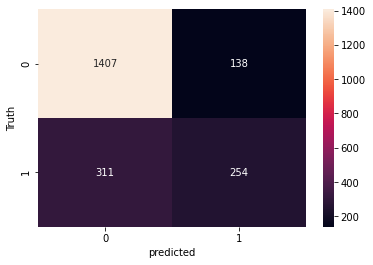

In [420]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
